# K MADUSH

## TASK 1 - EXPLORARY DATA ANALYSIS

### Introduction

### Exploratory Data Analysis on 'sample superstore'

Objective is Indentify weak area to make more profit.

### Steps of Credit Data Analysis

Reading the Dataset into Notebook.

Check for Data imbalance.

Split the analysis into small segments using individaul feature.

Data Cleaning, Missing Data Handling, Type casting are done segment wise.

Perform Data Visualization segment-wise as well.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn Style
plt.style.use('seaborn-pastel')
%matplotlib inline

READING DATA TO NOTEBOOK

'SampleSuperstore.csv' contains all the information of the Superstore Sales and related details.

In [3]:
#Reading data to notebook

data = pd.read_csv("SampleSuperstore.csv")

First Let's Analysis "application_data.csv"

In [4]:
#Trying to understand data
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
print(data.shape)
print(f'Now we have {data.shape[1]} features and {data.shape[0]} rows')

(9994, 13)
Now we have 13 features and 9994 rows


In [7]:
print(f'List of columns is {list(data.columns)}')

List of columns is ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']


View the information like Range index, datatypes, number of non-null entries for each column by using the info() method.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

Let's try to remove columns which are having high percentage value of missing values

In [10]:
#Find percentage of missing values for each column.
data.isnull().sum() * 100 / len(data)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [11]:
#Find duplicated rows in dataset.
print(f'{data.duplicated().sum()} rows are duplicate entries in dataset')

17 rows are duplicate entries in dataset


In [12]:
#Drop duplicates 
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
print(data.shape)
print(f'Now we have {data.shape[1]} features and {data.shape[0]} rows')

(9994, 13)
Now we have 13 features and 9994 rows


In [14]:
#Finding numeric columns
data.dtypes[data.dtypes != 'object']

Postal Code      int64
Sales          float64
Quantity         int64
Discount       float64
Profit         float64
dtype: object

In [15]:
#Finding Non numeric columns
data.dtypes[data.dtypes == 'object']

Ship Mode       object
Segment         object
Country         object
City            object
State           object
Region          object
Category        object
Sub-Category    object
dtype: object

In [16]:
#View the unique Ship Mode in the data frame.

print(data['Ship Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [17]:
#View the unique Segment in the data frame.

print(data['Segment'].unique())

['Consumer' 'Corporate' 'Home Office']


In [18]:
#View the Country in the dataset.

print(data['Country'].unique())
print("\nThere are %d country in data."%data['Country'].nunique())

['United States']

There are 1 country in data.


In [19]:
#View the states in the dataset.

print(data['State'].unique())
print("\nThere are %d states in this data."%data['State'].nunique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

There are 49 states in this data.


In [20]:
#View the Region in the dataset.

print(data['Region'].unique())
print("\nThere are %d Region in this data."%data['Region'].nunique())

['South' 'West' 'Central' 'East']

There are 4 Region in this data.


In [21]:
#View the unique Sub-Category in the data frame.

print(data['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [22]:
#View the unique Category in the data frame.

print(data['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [23]:
data.drop(['Country', 'Postal Code'], axis = 1, inplace = True) 

## Now let's try to understand how data is balanced based on Profit.

In [24]:
def target_func(x):
    if x < 0:
        return 'Loss'
    elif x > 0:
        return 'Profit'
    else:
        return 'Break Even Point'

In [25]:
#copying data
data1 = data

In [26]:
data1['Target'] = data1['Profit'].apply(lambda x: target_func(x))

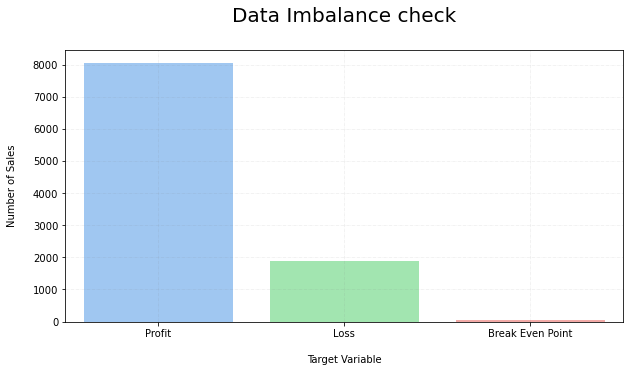

In [27]:
fig = plt.figure(figsize=(10,5))

plt.title('Data Imbalance check\n', size = 20)

sns.countplot(data1['Target']).set(ylabel="Number of Sales\n",
                                      xlabel = ('\nTarget Variable\n'))
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()

In [28]:
print("Percentage of Profit: ",round(
      data1[data1["Target"] == 'Profit'].shape[0]*100/(data1[data1["Target"] == 'Break Even Point'].shape[0]+data1[data1["Target"] == 'Profit'].shape[0]+data[data["Target"] == 'Loss'].shape[0]),2),'%')
print("Percentage of Loss: ",round(
      data1[data1["Target"] == 'Loss'].shape[0]*100/(data1[data1["Target"] == 'Break Even Point'].shape[0]+data1[data1["Target"] == 'Profit'].shape[0]+data[data["Target"] == 'Loss'].shape[0]),2),'%')
print("Percentage of Break Even Point: ",round(
      data1[data1["Target"] == 'Break Even Point'].shape[0]*100/(data1[data1["Target"] == 'Break Even Point'].shape[0]+data1[data1["Target"] == 'Profit'].shape[0]+data[data["Target"] == 'Loss'].shape[0]),2),'%')

Percentage of Profit:  80.63 %
Percentage of Loss:  18.72 %
Percentage of Break Even Point:  0.65 %


Because we have find weak areas to improve Profit we can choose profit and loss related data to work with.
Also, percentage of Break Even Point (No Loss or No Profit) can be removed

In [29]:
#Dropping Break even point rows
data1 = data1[~(data1["Target"] == 'Break Even Point')]

In [30]:
#Check after Drop function is applied
(data1["Target"] == 'Break Even Point').sum()

0

In [31]:
print(data1.shape)
print(f'Now we have {data1.shape[1]} features and {data1.shape[0]} rows')

(9929, 12)
Now we have 12 features and 9929 rows


As we can see in above bar Plot Data is highly imbalance The Ratio between Profit and Loss is nearly 80% / 20%. Suggesting us to analysis it seperately

In [32]:
profit_data  = data1[data1["Target"] =='Profit']
loss_data = data1[data1["Target"] == 'Loss']

## Segment Wise Analysis

### Let's Non Numeric Columns first


## Ship mode

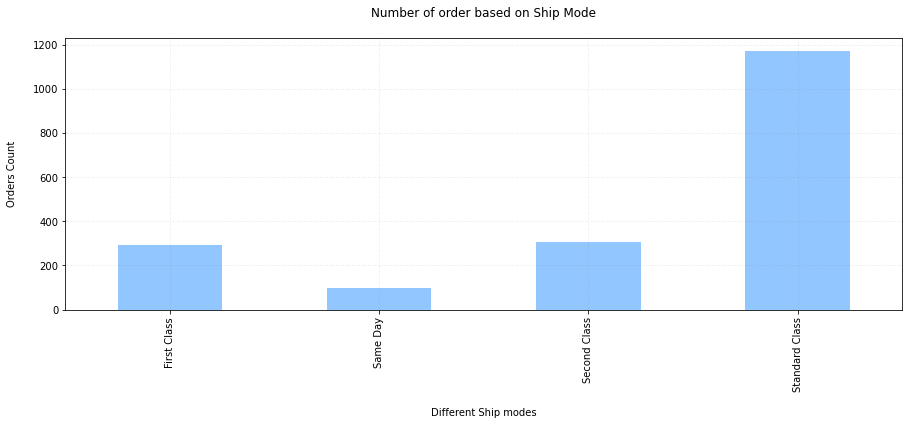

In [33]:
#Identify most Common Ship Mode leading to loss
plt.figure(figsize=(15,5))
plt.title("Number of order based on Ship Mode\n")
loss_data.groupby("Ship Mode")["Target"].count().plot.bar()
plt.xlabel("\nDifferent Ship modes\n")
plt.ylabel("Orders Count\n")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()

Most of Order which tend to be loss are shipped as Standard Class. But,

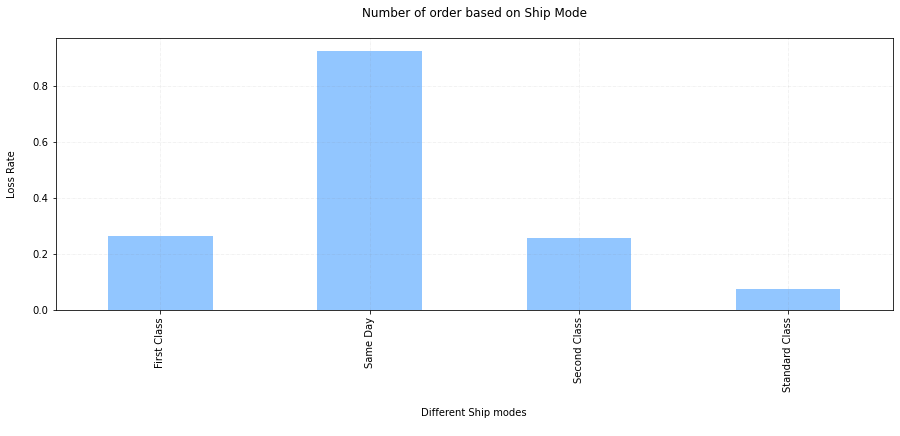

In [34]:
#Identify most Common Ship Mode leading to loss
plt.figure(figsize=(15,5))
plt.title("Number of order based on Ship Mode\n")
(-1 * loss_data.groupby(by='Ship Mode')["Profit"].mean()/loss_data.groupby(by='Ship Mode')["Profit"].count()).plot.bar()
plt.xlabel("\nDifferent Ship modes\n")
plt.ylabel("Loss Rate\n")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()

In [35]:
print(-100*loss_data.groupby(by='Ship Mode')["Profit"].mean()/loss_data.groupby(by='Ship Mode')["Profit"].count())

Ship Mode
First Class       26.395498
Same Day          92.649994
Second Class      25.702525
Standard Class     7.293148
Name: Profit, dtype: float64


Order whose ship mode is Same day loss rate is high about 92%

## Segment

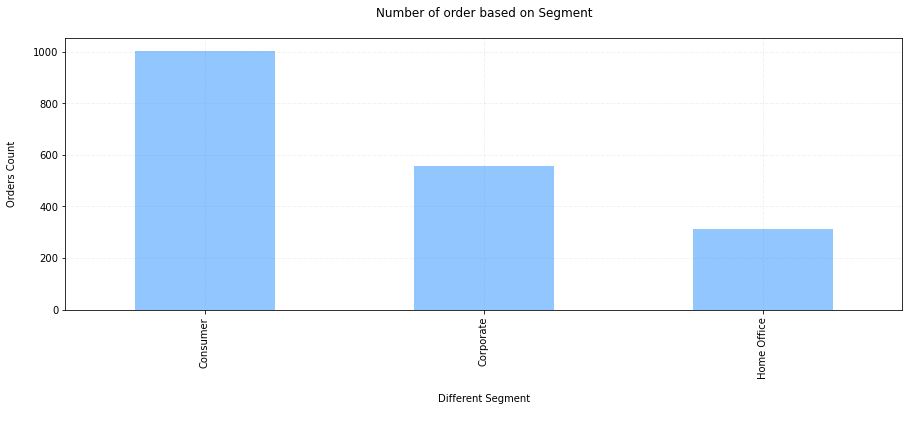

Segment
Consumer       1003
Corporate       556
Home Office     312
Name: Target, dtype: int64


In [36]:
#Identify most Common Segment leading to loss
plt.figure(figsize=(15,5))
plt.title("Number of order based on Segment\n")
loss_data.groupby("Segment")["Target"].count().plot.bar()
plt.xlabel("\nDifferent Segment\n")
plt.ylabel("Orders Count\n")

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()
print(loss_data.groupby("Segment")["Target"].count())

Most of Order which tend to be loss are Consumer's order. But,

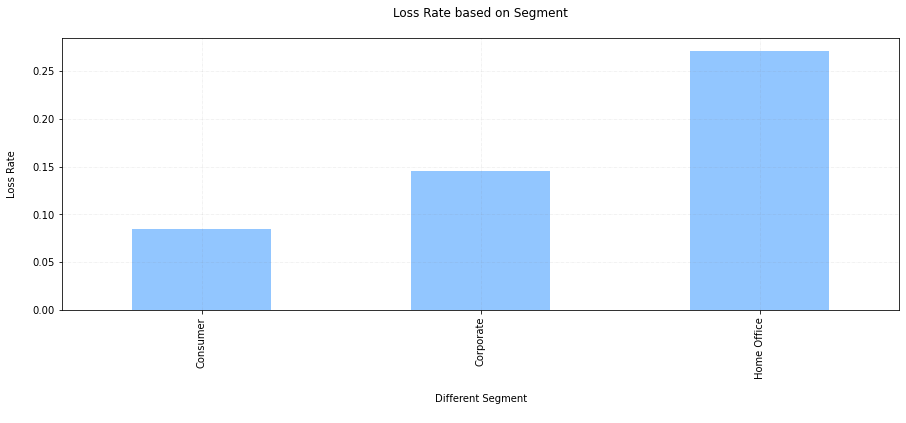

In [37]:
#Identify most Common Segment leading to loss
plt.figure(figsize=(15,5))
plt.title("Loss Rate based on Segment\n")
(-1 * loss_data.groupby(by='Segment')["Profit"].mean()/loss_data.groupby(by='Segment')["Profit"].count()).plot.bar()
plt.xlabel("\nDifferent Segment\n")
plt.ylabel("Loss Rate\n")

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()


In [38]:
print(-100 * loss_data.groupby(by='Segment')["Profit"].mean()/loss_data.groupby(by='Segment')["Profit"].count())

Segment
Consumer        8.443832
Corporate      14.487865
Home Office    27.118638
Name: Profit, dtype: float64


Consumer and Home office have high Loss Rate about 27%

##  Region

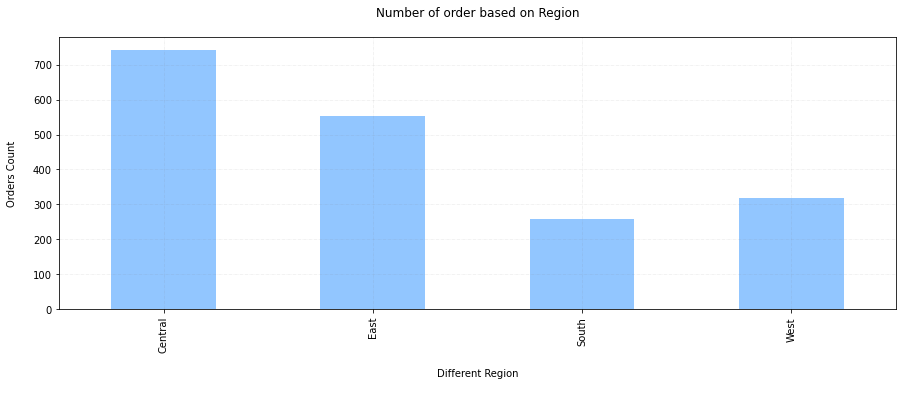

Region
Central    741
East       553
South      259
West       318
Name: Target, dtype: int64


In [39]:
#Identify most Common Region leading to loss
plt.figure(figsize=(15,5))
plt.title("Number of order based on Region\n")
loss_data.groupby("Region")["Target"].count().plot.bar()
plt.xlabel("\nDifferent Region\n")
plt.ylabel("Orders Count\n")

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()
print(loss_data.groupby("Region")["Target"].count())

Most of Order which tend to be loss belongs to central Region. But,

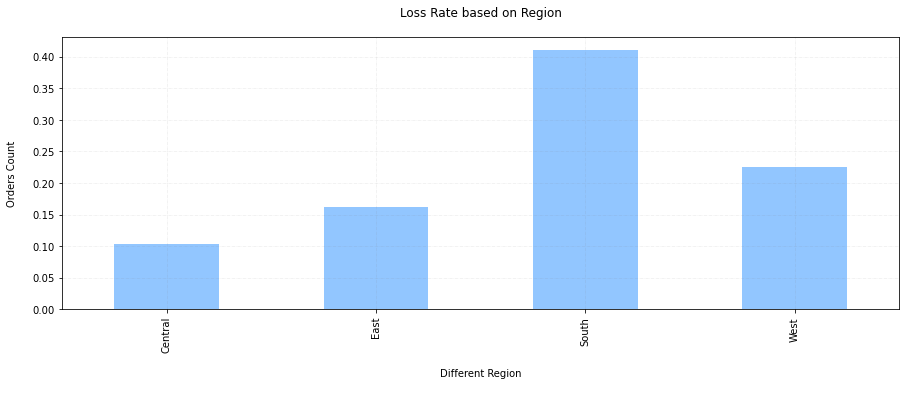

In [40]:
#Identify most Common Region leading to loss
plt.figure(figsize=(15,5))
plt.title("Loss Rate based on Region\n")
(-1 * loss_data.groupby(by='Region')["Profit"].mean()/loss_data.groupby(by='Region')["Profit"].count()).plot.bar()
plt.xlabel("\nDifferent Region\n")
plt.ylabel("Orders Count\n")

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()


In [41]:
print(-100 * loss_data.groupby(by='Region')["Profit"].mean()/loss_data.groupby(by='Region')["Profit"].count())

Region
Central    10.256207
East       16.216203
South      41.002418
West       22.468416
Name: Profit, dtype: float64


Highest Loss rate is at South Region of about 41% 

## Category

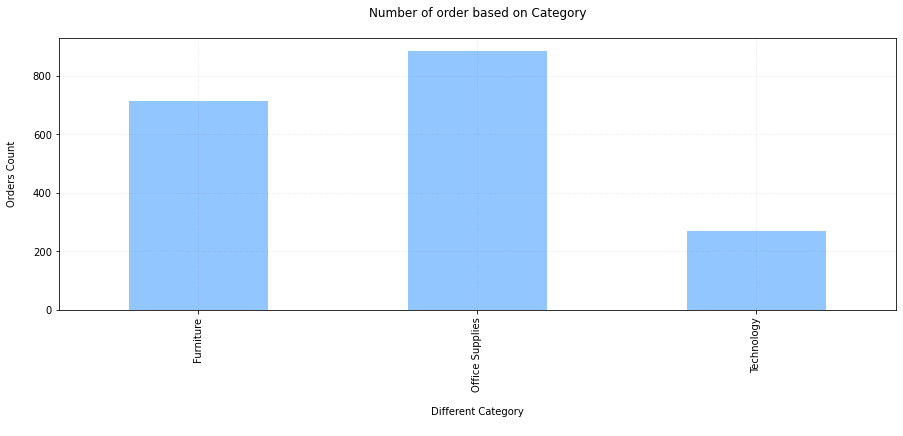

Category
Furniture          714
Office Supplies    886
Technology         271
Name: Target, dtype: int64


In [42]:
#Identify most Common category leading to loss
plt.figure(figsize=(15,5))
plt.title("Number of order based on Category\n")
loss_data.groupby("Category")["Target"].count().plot.bar()
plt.xlabel("\nDifferent Category\n")
plt.ylabel("Orders Count\n")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()
print(loss_data.groupby("Category")["Target"].count())

Most of Order which tend to be loss belongs to Office supplies category. But,

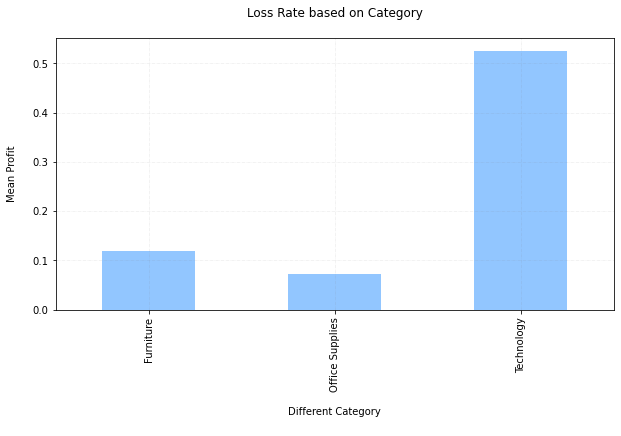

In [43]:
loss_data.groupby(by='Category')["Profit"].mean()
plt.figure(figsize=(10,5))
plt.title("Loss Rate based on Category\n")
(-1 * loss_data.groupby(by='Category')["Profit"].mean()/loss_data.groupby("Category")["Profit"].count()).plot.bar()
plt.xlabel("\nDifferent Category\n")
plt.ylabel("Mean Profit\n")
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()


In [44]:
print(-100 * loss_data.groupby(by='Category')["Profit"].mean()/loss_data.groupby("Category")["Profit"].count())

Category
Furniture          11.953038
Office Supplies     7.212172
Technology         52.531853
Name: Profit, dtype: float64


Technology has high loss rate ab our 52%.

## State

In [45]:
loss_data['Profit/Sales'] = loss_data['Profit']/loss_data['Sales']

In [46]:
loss_data.groupby(by='State').sum().sort_values('Profit/Sales',ascending=True).head(3)

,Sales,Quantity,Discount,Profit,Profit/Sales
State,,,,,
Texas,102656.4568,1855,263.24,-36813.1875,-452.270763
Illinois,38626.2020,948,143.90,-19501.6975,-244.365714
Pennsylvania,75792.2320,993,128.10,-21602.8515,-117.947976


State Texas, Illinois and Pennsylvania are top 3 states where loss per sales is high

In [47]:
pd.pivot_table(loss_data, index=['State', 'City'], aggfunc='mean', sort=True).sort_values(by=['Profit/Sales'],ascending=True)

Discount     Profit  Profit/Sales   Quantity  \
State      City                                                        
Texas      Abilene           0.8   -3.75840     -2.700000   2.000000   
Illinois   Frankfort         0.8  -52.95840     -2.550000   8.000000   
           Bolingbrook       0.8  -15.01090     -2.000000   3.500000   
Texas      Bedford           0.8  -22.51200     -1.750000   8.000000   
Illinois   Oswego            0.8 -270.12005     -1.725000   4.000000   
...                          ...        ...           ...        ...   
Ohio       Parma             0.3  -13.92220     -0.028571   3.666667   
Texas      Coppell           0.2   -0.20980     -0.012500   1.000000   
Washington Des Moines        0.2   -2.69970     -0.012500   3.000000   
California Sunnyvale         0.2   -2.69970     -0.012500   3.000000   
New York   Buffalo           0.2  -50.09800     -0.012500  10.000000   

                              Sales  
State      City                      
Texas      Abilene         1.392000  
Illinois   Frankfort      20.768000  
           Bolingbrook     7.874000  
Texas      Bedford        12.864000  
Illinois   Oswego        154.409000  
...                             ...  
Ohio       Parma         702.515333  
Texas      Coppell        16.784000  
Washington Des Moines    215.976000  
California Sunnyvale     215.976000  
New York   Buffalo      4007.840000  

[243 rows x 5 columns]

City Abilene from Texas State, Frankfort and Bolingbrook from state Illinois are top 3 city where loss Rate is high.

## Sub-Category

In [48]:
loss_data.groupby(by='Sub-Category').sum().sort_values('Profit/Sales',ascending=True).head(3)

,Sales,Quantity,Discount,Profit,Profit/Sales
Sub-Category,,,,,
Binders,36140.613,2456,452.4,-38510.4964,-660.883333
Appliances,3382.534,235,53.6,-8629.6412,-169.750000
Furnishings,12845.844,597,88.6,-6490.9134,-97.637500


Binders, Appliances and Furnishings are top 3 Sub-Category where loss per sales is high